In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# print('# File sizes')
# for f in os.listdir('input'):
#     if not os.path.isdir('input'+ f):
#         print(f.ljust(30) + str(round(os.path.getsize('input' + f) / 1000000, 2)) + 'MB')
#     else:
#         sizes = [os.path.getsize('input'+f+'/'+x)/1000000 for x in os.listdir('input' + f)]
#         print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))
        
        

In [19]:
##Training data

df_train = pd.read_csv('input/train.csv')
df_train.head()


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [20]:
labels = df_train['tags'].apply(lambda x: x.split(' '))

from collections import Counter, defaultdict
counts = defaultdict(int)
for l in labels:
    for l2 in l:
        counts[l2] += 1
data = [go.Bar(x= list(counts.keys()), y = list(counts.values()))]
layout = dict(height = 800, width = 800, title = 'Distribution of training labels')
fig = dict(data = data, layout = layout)
py.iplot(data, filename = 'train-label-dist')

In [23]:
#Co-occurrence Matrix
com = np.zeros([len(counts)]*2)
for i, l in enumerate(list(counts.keys())):
    for i2, l2 in enumerate(list(counts.keys())):
        c = 0
        cy = 0
        for row in labels.values:
            if l in row:
                c += 1
                if l2 in row: cy += 1
        com[i, i2] = cy / c
        
data=[go.Heatmap(z=com, x=list(counts.keys()), y=list(counts.keys()))]
layout=go.Layout(height=800, width=800, title='Co-occurence matrix of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-com')

error: C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


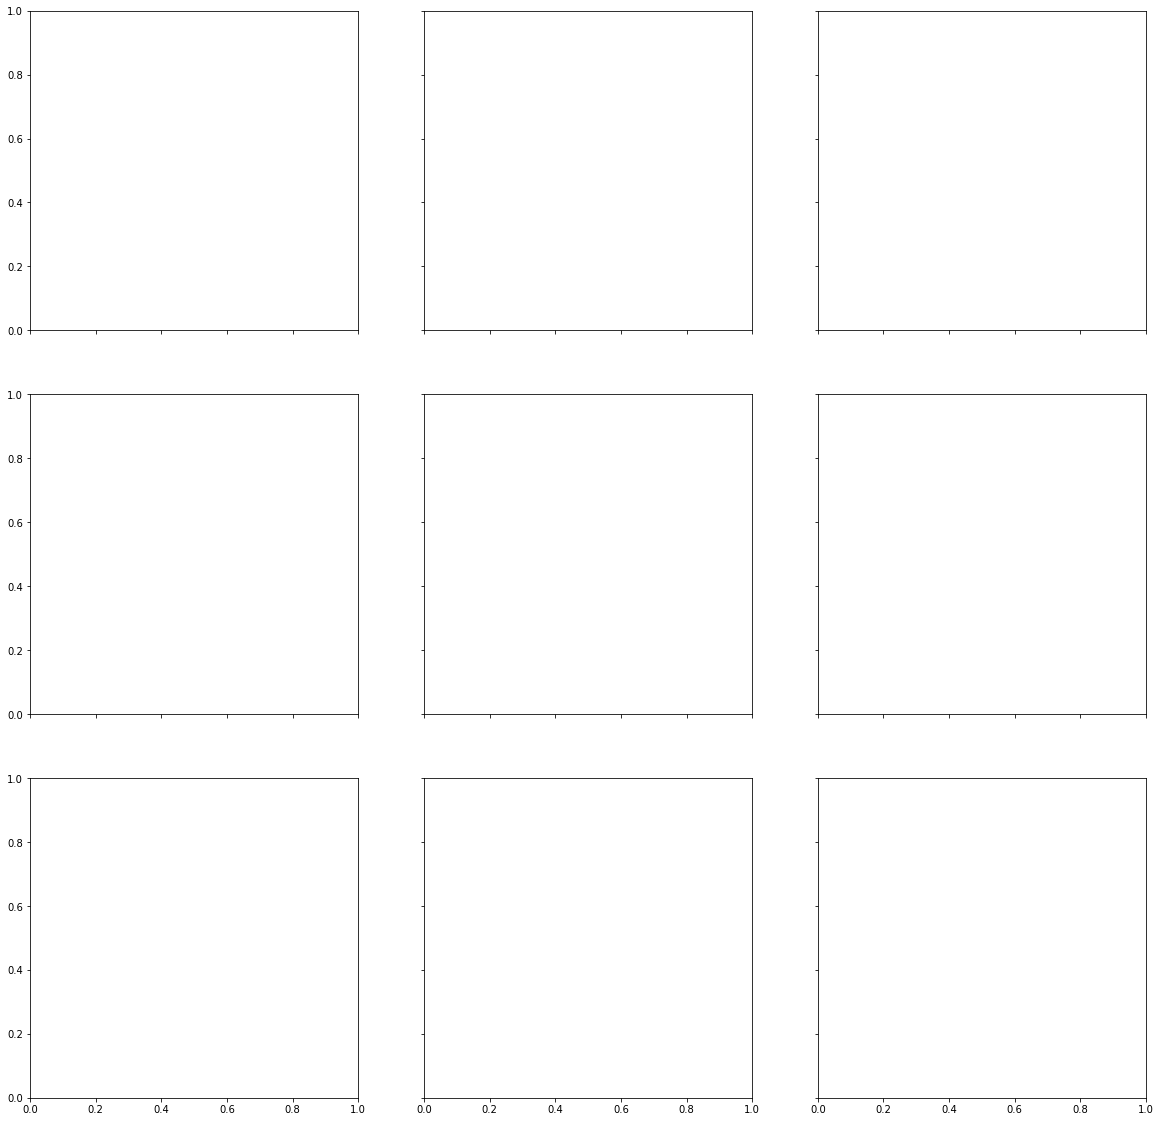

In [28]:
import cv2
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
i = 0
for f, l in df_train[:9].values:
    img = cv2.imread('../input/train-jpg/{}.jpg'.format(f))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))
    #ax[i // 4, i % 4].show()
    i += 1
    
plt.show()